# CIFAR-10 Veri Seti ile KNN Modeli
Bu proje, CIFAR-10 veri setini kullanarak K-Nearest Neighbors (KNN) algoritmasını eğitmek ve matplotlib ile sonuçları görselleştirmek amacıyla hazırlanmıştır.

In [1]:
# Gerekli Kütüphaneleri İçe Aktarma ve Veri Setini Yükleme
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# CIFAR-10 veri setini yükleyin
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdırın
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Veri Görselleştirme
Veri setindeki 10 görüntüyü görselleştirme işlemi.

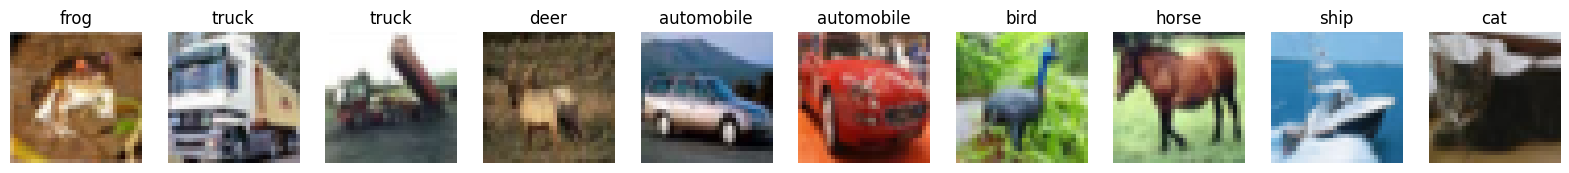

In [2]:
# CIFAR-10 sınıf adları
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 10 görüntüyü görselleştirin
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
    axes[i].set_title(class_names[y_train[i][0]])
plt.show()

## Verileri Normalize Etme

In [3]:
# Verileri normalize edin
X_train = X_train / 255.0
X_test = X_test / 255.0

## Veriyi Yeniden Şekillendirme
KNN algoritması için veriyi düzleştirme işlemi.

In [4]:
# Verileri yeniden şekillendirin (KNN için düzleştirilmiş 2D dizi gerekir)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Etiketleri düzleştirin
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

## PCA ile Boyut Azaltma

In [5]:
# PCA ile boyut azaltma
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

## KNN Modeli Oluşturma ve Eğitme
KNN modelini oluşturma ve GridSearchCV kullanarak hiperparametre optimizasyonu

In [6]:
# KNN modelini oluşturun ve eğitin (GridSearchCV ile hiperparametre optimizasyonu)
param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3)
grid_search.fit(X_train_pca, y_train_flat)

# En iyi modeli seçin
best_knn = grid_search.best_estimator_

# Test verileri ile tahmin yapın
y_pred = best_knn.predict(X_test_pca)

# Sonuçları değerlendirin
accuracy = accuracy_score(y_test_flat, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test_flat, y_pred, target_names=class_names))
print('Confusion Matrix:')
print(confusion_matrix(y_test_flat, y_pred))

Accuracy: 0.3627
Classification Report:
              precision    recall  f1-score   support

    airplane       0.42      0.55      0.48      1000
  automobile       0.68      0.25      0.37      1000
        bird       0.24      0.46      0.31      1000
         cat       0.29      0.19      0.23      1000
        deer       0.25      0.51      0.33      1000
         dog       0.45      0.22      0.29      1000
        frog       0.35      0.37      0.36      1000
       horse       0.66      0.24      0.35      1000
        ship       0.43      0.66      0.52      1000
       truck       0.74      0.19      0.30      1000

    accuracy                           0.36     10000
   macro avg       0.45      0.36      0.35     10000
weighted avg       0.45      0.36      0.35     10000

Confusion Matrix:
[[545   9 116  11  52   6  33   5 216   7]
 [111 254 106  37 146  20  87  16 197  26]
 [ 99   3 458  45 239  23  76  11  42   4]
 [ 59   8 221 188 198  97 156  22  44   7]
 [ 60   1 2

## Sonuçları Görselleştirme
KNN modelinin tahmin ettiği bazı görüntüleri ve tahmin sonuçlarını görselleştirme.

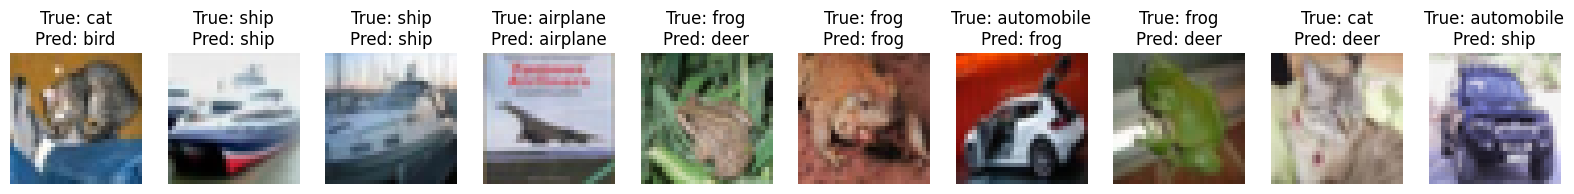

In [7]:
# Tahmin sonuçlarını görselleştirin
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')
    axes[i].set_title(f'True: {class_names[y_test_flat[i]]}\nPred: {class_names[y_pred[i]]}')
plt.show()